# **AWS SaaS Sales**

## Introduction


The AWS SaaS Sales dataset provides transactional data from a hypothetical B2B SaaS company specializing in sales and marketing software. Each row represents a product within a transaction, with detailed information such as unique identifiers for each transaction and order, dates, customer and contact details, and geographical data (country, city, region, and subregion). Additionally, it captures customer specifics like industry and segment, alongside product details, sales amounts, quantities, discounts, and profits. This dataset offers valuable insights for analyzing profit, sales performance across different regions and customer segments, etc.

In the dataset, each row represents a product in a transaction, and the columns include:
 1. Row ID: A unique identifier for each transaction.
 2. Order ID: A unique identifier for each order.
 3. Order Date: The date when the order was placed.
 4. Date Key: A numerical representation of the order date (YYYYMMDD).
 5. Contact Name: The name of the person who placed the order.
 6. Country: The country where the order was placed.
 7. City: The city where the order was placed.
 8. Region: The region where the order was placed.
 9. Subregion: The subregion where the order was placed.
 10. Customer: The name of the company that placed the order.
 11. Customer ID: A unique identifier for each customer.
 12. Industry: The industry the customer belongs to.
 13. Segment: The customer segment (SMB, Strategic, Enterprise, etc.).
 14. Product: The product was ordered.
 15. License: The license key for the product.
 16. Sales: The total sales amount for the transaction.
 17. Quantity: The total number of items in the transaction.
 18. Discount: The discount applied to the transaction.
 19. Profit: The profit from the transaction

In this analysis, we aim to identify factors that can drive an increase in profit while simultaneously pinpointing potential risks that may reduce profitability. By examining product performance, customer segments, and regional variations, etc., we will seek to understand which strategies could maximize returns and where losses may be minimized. This approach will help us develop data-driven recommendations for enhancing profit stability and mitigating risks associated with variability in sales and discounts.

## Data Preparation

Import library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import squarify
import plotly.express as px
import scipy.stats as stats

Load Data

In [68]:
df = pd.read_csv('SaaS-Sales.csv')

Data Inspection

In [69]:
df.head(5)

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,1,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136
1,2,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
2,3,AMER-2022-138688,6/13/2022,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714
3,4,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
4,5,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Row ID        9994 non-null   int64  
 1   Order ID      9994 non-null   object 
 2   Order Date    9994 non-null   object 
 3   Date Key      9994 non-null   int64  
 4   Contact Name  9994 non-null   object 
 5   Country       9994 non-null   object 
 6   City          9994 non-null   object 
 7   Region        9994 non-null   object 
 8   Subregion     9994 non-null   object 
 9   Customer      9994 non-null   object 
 10  Customer ID   9994 non-null   int64  
 11  Industry      9994 non-null   object 
 12  Segment       9994 non-null   object 
 13  Product       9994 non-null   object 
 14  License       9994 non-null   object 
 15  Sales         9994 non-null   float64
 16  Quantity      9994 non-null   int64  
 17  Discount      9994 non-null   float64
 18  Profit        9994 non-null 

Change format 'Order Date' to datetime to easier the analysis

In [5]:
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%m/%d/%Y')

In [6]:
df['Order Date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 9994 entries, 0 to 9993
Series name: Order Date
Non-Null Count  Dtype         
--------------  -----         
9994 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 78.2 KB


First, we will check is there any missing data (NaN), duplicated data, or Outlier Data

In [7]:
#Check missing data
df.isna().sum()

Row ID          0
Order ID        0
Order Date      0
Date Key        0
Contact Name    0
Country         0
City            0
Region          0
Subregion       0
Customer        0
Customer ID     0
Industry        0
Segment         0
Product         0
License         0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

From the data above, the is no missing data in the data.\
Next, check for the duplicated data.

In [8]:
df['Row ID'].duplicated().sum()

0

For the 'Row ID' there is no duplicated data. \
Next, check is there any duplicated from the combination column

In [9]:
df.duplicated(subset=['Order ID','Date Key','Contact Name','Country','Customer ID','Product','License'], keep=False).sum()

0

For the combination columns there is no duplicated data. \
We will also check corresponding between the related column

In [10]:
cust_vs_custid = "The 'Customer' column corresponds to the 'Customer ID' column" if len(df['Customer'].unique())==len(df['Customer ID'].unique()) else "The 'Customer' column doesn't correspond to the 'Customer ID' column"
print(cust_vs_custid)

The 'Customer' column corresponds to the 'Customer ID' column


In [11]:
product_vs_license = "The 'Product' column corresponds to the 'License' column" if len(df['Product'].unique())==len(df['License'].unique()) else "The 'Product' column doesn't correspond to the 'License' column"
print(product_vs_license)

The 'Product' column doesn't correspond to the 'License' column


For the 'Customer' and 'Customer ID' is already corresponding\
and the number of data for the 'Product' and 'License' is differen. It means that the are products that have more than 1 License.\
\
Next, we will check the number of outlier of the column ('Profit','Sales','Discount','Quantity')

In [12]:
def outlier_analysis(data_):
    Q1 = data_.quantile(0.25)
    Q3 = data_.quantile(0.75)
    IQR= Q3-Q1

    lb = Q1-1.5*IQR
    ub = Q3+1.5*IQR

    return lb,ub

In [13]:
col_outlier = ['Quantity','Profit','Sales','Discount']
num_outlier = [df[(df[columns] < outlier_analysis(df[columns])[0]) | (df[columns] > outlier_analysis(df[columns])[1])].shape[0] for columns in col_outlier]
pd.DataFrame([num_outlier], columns=col_outlier, index=['Number of Outlier'])

,Quantity,Profit,Sales,Discount
Number of Outlier,170,1881,1167,856


In [14]:
df[['Quantity','Profit','Sales','Discount']].describe()

,Quantity,Profit,Sales,Discount
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,3.789574,28.656896,229.858001,0.156203
std,2.225110,234.260108,623.245101,0.206452
min,1.000000,-6599.978000,0.444000,0.000000
25%,2.000000,1.728750,17.280000,0.000000
50%,3.000000,8.666500,54.490000,0.200000
75%,5.000000,29.364000,209.940000,0.200000
max,14.000000,8399.976000,22638.480000,0.800000


For the quantity column, the number of outliers is only 170 out of a total of 9994 data points, with a minimum value of 1 and a maximum of 14. Therefore, the outliers are not highly significant.

The average discount (0.156) compared to the maximum value (0.8) indicates that most transactions do not have a large discount; however, there are a few transactions with significant discounts. Retaining these outliers is important to identify extreme discount policies.

So, for these two columns, we will leave them as they are without removing, altering, or transforming the values.

For the profit column, there are 1,881 outliers out of 9,994 data points (about 18.8%). This is a significant portion, making it impractical to simply remove these outliers. From the descriptive statistics, we can see that the minimum value is -6,599.978 and the maximum is 8,399.976, with a standard deviation of 234.260108 and an average of 28.656896. This indicates extreme variations in profit values, so we will apply the winsorizing method.

Winsorizing is a statistical technique that limits extreme values in data by setting outliers to a specific percentile value, such as the 1st and 99th percentiles. This approach helps reduce the influence of extreme values while preserving the overall distribution.

In [15]:
df['Profit_winsorized'] = stats.mstats.winsorize(df['Profit'], limits=[0.005, 0.005])

In [16]:
df[['Profit','Profit_winsorized']].describe()

,Profit,Profit_winsorized
count,9994.000000,9994.000000
mean,28.656896,26.873121
std,234.260108,114.835418
min,-6599.978000,-509.997000
25%,1.728750,1.728750
50%,8.666500,8.666500
75%,29.364000,29.364000
max,8399.976000,843.170600


After applying winsorizing, the minimum, maximum, and standard deviation values decreased significantly, making the data less variable without the need to remove outliers.

For the Sales column, however, we will not apply winsorizing. Although there are 1,167 outliers in Sales, representing approximately 11.7% of the data, these outliers provide valuable insights into high-volume transactions that could be critical for understanding revenue patterns, such as large orders or seasonal spikes. The high variability in Sales reflects the natural diversity in transaction sizes, which we want to retain for analyses focused on sales trends, customer behavior, and promotional impacts. Winsorizing in this case could mask important information about significant sales events. So, we will no change this data.

## Exploratory Data Analyzing

In this data analysis, we aim to understand the various factors affecting profitability and risk in the business. The primary goal of Exploratory Data Analysis (EDA) is to gain deep insights into the available data. Through EDA, we can identify patterns, trends, and anomalies that can contribute to better decision-making.

First, we will show  the general information from the data

In [17]:
Total_Sales = df['Sales'].sum()
Total_Sales

2297200.8603000003

In [18]:
Total_Profit = df['Profit'].sum()
Total_Profit

286397.0217

In [19]:
Percentage_profit = round((Total_Profit*100/Total_Sales),2)
print(Percentage_profit,'%')

12.47 %


In [20]:
Total_order_id = df['Order ID'].nunique()
Total_order_id

5009

In [21]:
df['Month'] = df['Order Date'].dt.to_period('M')
monthly_sales = df.groupby('Month')['Sales'].sum().reset_index()
monthly_sales['Month'] = monthly_sales['Month'].dt.to_timestamp() 

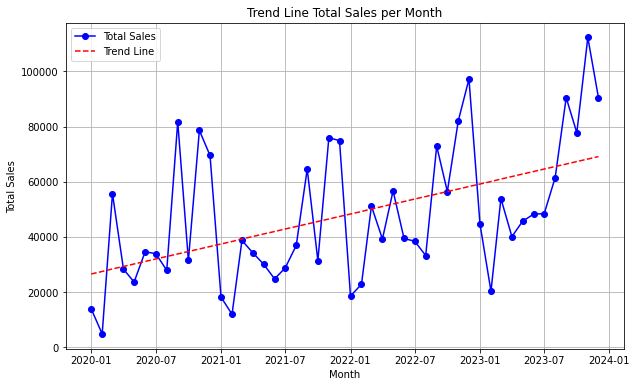

In [22]:
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales['Month'], monthly_sales['Sales'], marker='o', linestyle='-', color='b', label='Total Sales')

z = np.polyfit(range(len(monthly_sales['Sales'])), monthly_sales['Sales'], 1)
p = np.poly1d(z)
plt.plot(monthly_sales['Month'], p(range(len(monthly_sales['Sales']))), linestyle='--', color='r', label='Trend Line')

plt.title('Trend Line Total Sales per Month')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.legend()
plt.grid()

# Menampilkan plot
plt.show()

Based on the chart, sales performance has increased over time, even though the trend is still fluctuating.

In [23]:
customer_sales = df.groupby('Customer')['Sales'].sum().sort_values(ascending=False).reset_index()
customer_sales.head(10)

,Customer,Sales
0,Anthem,55719.2100
1,Ford Motor,43893.0424
2,Allianz,42904.1670
3,Bank of America Corp.,41255.9471
4,Valero Energy,41220.4188
5,Lowes,40360.1630
6,Tyson Foods,40326.3440
7,Allstate,39941.6400
8,AmerisourceBergen,39234.7610
9,BMW,39083.7900


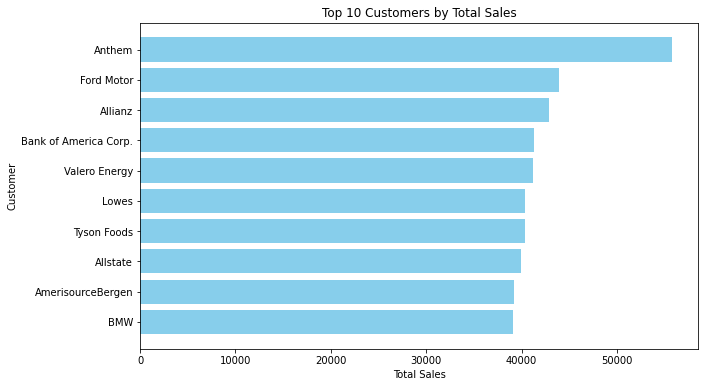

In [24]:
top_customers = customer_sales.head(10)

plt.figure(figsize=(10, 6))
plt.barh(top_customers['Customer'], top_customers['Sales'], color='skyblue')
plt.xlabel('Total Sales')
plt.ylabel('Customer')
plt.title('Top 10 Customers by Total Sales')
plt.gca().invert_yaxis()
plt.show()

We also highlight the top 10 customers by total sales to emphasize the importance of maintaining strong relationships with these key clients. Focusing on these high-value customers can help ensure consistent revenue and foster customer loyalty over time.

Next,  for numerical data, we will check do the column 'Profit', 'Profit_winsorized', 'Sales', 'Quantity' and 'Discount' follow normal distribution or not. 

* Profit 

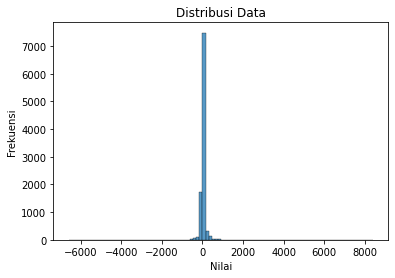

In [25]:
sns.histplot(df['Profit'] , bins=100)
plt.xlabel('Nilai')
plt.ylabel('Frekuensi')
plt.title('Distribusi Data')
plt.show()

In [26]:
stat, p_value = stats.normaltest(df['Profit'])
print("D’Agostino’s K-squared Test Statistic:", stat)
print("p-value:", p_value)

alpha = 0.05
if p_value > alpha:
    print("The data appears to follow a normal distribution (fail to reject H0)")
else:
    print("The data does not follow a normal distribution (reject H0)")

D’Agostino’s K-squared Test Statistic: 14363.736243749532
p-value: 0.0
The data does not follow a normal distribution (reject H0)


* Profit_winsorized

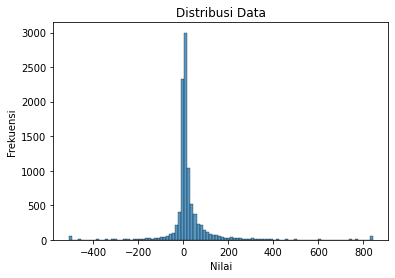

In [27]:
sns.histplot(df['Profit_winsorized'] , bins=100)
plt.xlabel('Nilai')
plt.ylabel('Frekuensi')
plt.title('Distribusi Data')
plt.show()

In [28]:
stat, p_value = stats.normaltest(df['Profit_winsorized'])
print("D’Agostino’s K-squared Test Statistic:", stat)
print("p-value:", p_value)

alpha = 0.05
if p_value > alpha:
    print("The data appears to follow a normal distribution (fail to reject H0)")
else:
    print("The data does not follow a normal distribution (reject H0)")

D’Agostino’s K-squared Test Statistic: 6455.7344743501835
p-value: 0.0
The data does not follow a normal distribution (reject H0)


* Sales

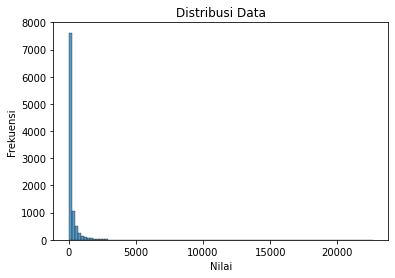

In [29]:
sns.histplot(df['Sales'] , bins=100)
plt.xlabel('Nilai')
plt.ylabel('Frekuensi')
plt.title('Distribusi Data')
plt.show()

In [30]:
stat, p_value = stats.normaltest(df['Sales'])
print("D’Agostino’s K-squared Test Statistic:", stat)
print("p-value:", p_value)

alpha = 0.05
if p_value > alpha:
    print("The data appears to follow a normal distribution (fail to reject H0)")
else:
    print("The data does not follow a normal distribution (reject H0)")

D’Agostino’s K-squared Test Statistic: 18033.30849753588
p-value: 0.0
The data does not follow a normal distribution (reject H0)


* Quantity

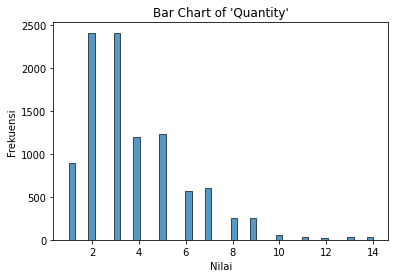

In [31]:
sns.histplot(df['Quantity'])
plt.xlabel('Nilai')
plt.ylabel('Frekuensi')
plt.title('Bar Chart of \'Quantity\'')
plt.show()

* Discount

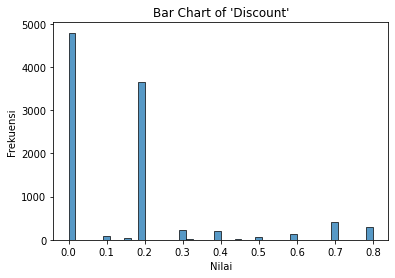

In [32]:
sns.histplot(df['Discount'])
plt.xlabel('Nilai')
plt.ylabel('Frekuensi')
plt.title('Bar Chart of \'Discount\'')
plt.show()

For the Quantity and Discount column, we don't need to do normal test due to these data are disctrit data.

Based on the previous result, we will use non parametric test and use spearman for correlation due to the columns don't follow normal distribution.

In [33]:
#Correlation between 'Sales','Quantity','Discount','Profit_winsorized'
correlation_matrix = df[['Sales','Quantity','Discount','Profit_winsorized']].corr(method='spearman')

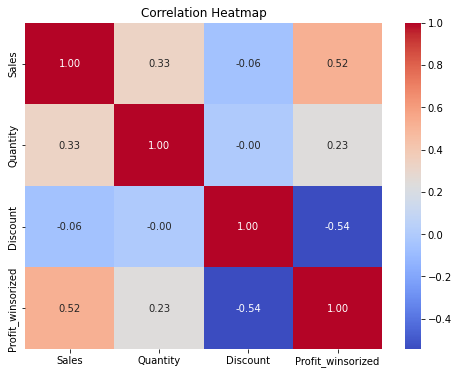

In [34]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

From the heatmap above, we can see that 'Sales' has positive moderately correlated (0.52) with 'Profit_winsorized', but 'Discount' has negative moderately correlated (-0.54). While other correlation have no or small correlation. We will use these information (column 'Sales' and 'Discount') for analysis the profit.

Below, we present the distribution of sales data by region and subregion. Special attention should be given to regions and subregions with the highest contributions to total sales, while developing new strategies to boost sales in the lower-performing areas.

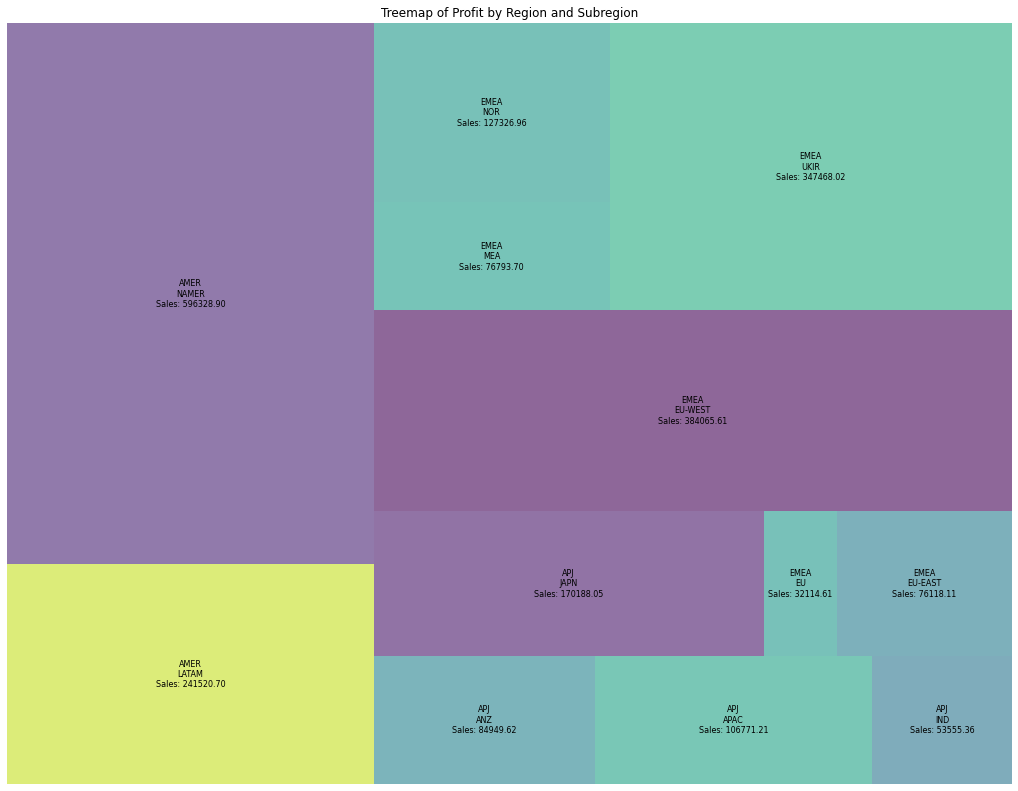

In [35]:
grouped_df = df.groupby(['Region', 'Subregion'])['Sales'].sum().reset_index()

grouped_df['label'] = grouped_df.apply(lambda x: f"{x['Region']}\n{x['Subregion']}\nSales: {x['Sales']:.2f}", axis=1)

plt.figure(figsize=(18, 14))
squarify.plot(
    sizes=grouped_df['Sales'],
    label=grouped_df['label'],
    alpha=0.6,
    text_kwargs={'fontsize': 8}
)
plt.axis('off')
plt.title("Treemap of Profit by Region and Subregion")
plt.show()


Next, we present the distribution of sales by country. Similar to the previous analysis, this chart helps us focus on maintaining sales in high-impact countries to maximize overall performance.

In [36]:
aggregated_df = df.groupby('Country')['Sales'].agg(['sum', 'count']).reset_index()

fig = px.scatter(
    aggregated_df, 
    x='count',
    y='sum',
    size='sum',
    color='Country',
    hover_name='Country',
    labels={'count': 'Number of Transactions', 'sum': 'Total Sales'},
    title='Bubble Chart of Sales by Country'
)
fig.show()

In addition, we provide a heatmap illustrating the relationship between industry and segment in terms of total sales. This visualization allows us to identify which industry-segment combinations contribute the most to overall sales and to spot potential areas for growth. By focusing on high-performing combinations, we can develop targeted strategies to reinforce these strengths, while lower-performing pairs may benefit from specialized approaches to boost their sales.

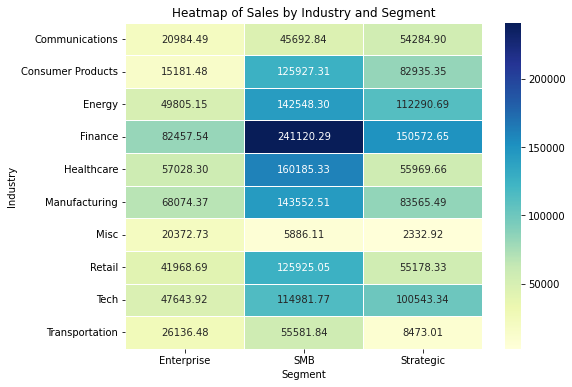

In [37]:
pivot_df = df.pivot_table(index='Industry', columns='Segment', values='Sales', aggfunc='sum', fill_value=0)

plt.figure(figsize=(8, 6))
sns.heatmap(pivot_df, annot=True, cmap='YlGnBu', fmt=".2f", linewidths=0.5)
plt.title("Heatmap of Sales by Industry and Segment")
plt.xlabel("Segment")
plt.ylabel("Industry")
plt.show()

After highlighting the factors contributing most significantly to total sales, it is essential to focus on these insights from the charts to develop targeted strategies. For areas with lower sales, a refined approach can be applied to unlock potential growth. Overall, these charts serve as a foundation for identifying our primary markets and recognizing less effective segments, guiding future efforts toward optimized resource allocation and market penetration.

As mentioned previously, sales have a moderate correlation with profit. Therefore, one potential strategy to increase profit is by focusing on initiatives that drive up total sales, which, in turn, could positively impact profitability.

Next, we will provide insights into the discount column, as discount levels show a moderately negative correlation with profit. This suggests that an ineffective discount strategy could lead to a decrease in profit. Careful analysis is needed to understand the impact of discounts and to design a strategy that maximizes profitability while minimizing potential profit losses due to excessive discounting.

First, we try to categorize the discount column as [None, Low, Medium, High]

In [38]:
def categorize_discount(discount):
    if discount<0.001:
        return 'None'
    elif 0.001<=discount<0.25:
        return 'Low'
    elif 0.25<=discount<0.5:
        return 'Medium'
    else: 
        return 'High'

Next, we will present the proportion of the discount categories by region. Since discounts can reduce profit, we need to consider whether to reduce or remove the discount in each region.

In [39]:
df['Discount_Category'] = df['Discount'].apply(categorize_discount)
aggregated_df = df.groupby(['Region','Discount_Category']).size().reset_index(name='Count')
total_count = aggregated_df['Count'].sum()
aggregated_df['Percentage'] = ((aggregated_df['Count'] / total_count * 100).round(2)).astype(str) + '%'

In [40]:
fig = px.sunburst(
    aggregated_df,
    path=['Region', 'Percentage'],
    values='Count',
    color='Discount_Category',
    color_discrete_map={
        'None': 'lightgreen',
        'Low': 'lightblue',
        'Medium': 'orange',
        'High': 'red'
    }
)
fig.update_layout(title="Multi-Level Pie Chart of Discount by Region",
    width =600,
    height =600)
fig.add_annotation(
    x=1.15, y=1.05, text="Legend", showarrow=False, font=dict(size=1)
)
fig.add_annotation(
    x=1.15, y=1.0, text="None (<1%)", showarrow=False, bgcolor="lightgreen",
    font=dict(color="black")
)
fig.add_annotation(
    x=1.15, y=0.95, text="Low (1%-25%)", showarrow=False, bgcolor="lightblue",
    font=dict(color="black")
)
fig.add_annotation(
    x=1.15, y=0.9, text="Medium (25%-50%)", showarrow=False, bgcolor="orange",
    font=dict(color="black")
)
fig.add_annotation(
    x=1.15, y=0.85, text="High (>50%)", showarrow=False, bgcolor="red",
    font=dict(color="white")
)

fig.show()

After that, we will show the distribution of the profit for each category of discount on the column Industry and Segment

* Industry

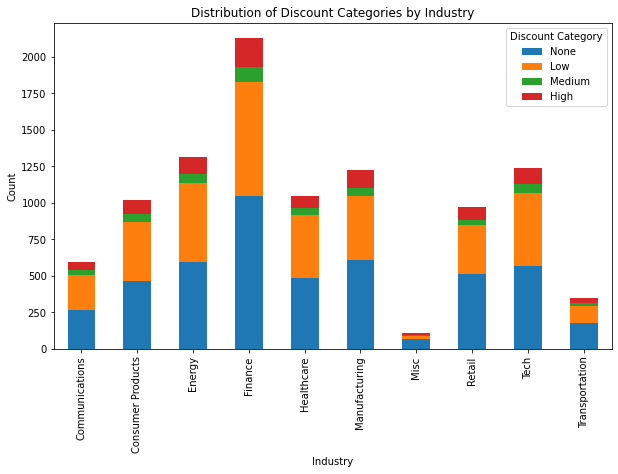

In [41]:
discount_order = ['None', 'Low', 'Medium', 'High']
df['Discount_Category'] = pd.Categorical(df['Discount_Category'], categories=discount_order, ordered=True)

pivot_df = df.pivot_table(index='Industry', columns='Discount_Category', aggfunc='size', fill_value=0)

# Plot stacked bar chart
pivot_df.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title("Distribution of Discount Categories by Industry")
plt.xlabel("Industry")
plt.ylabel("Count")
plt.legend(title="Discount Category")
plt.show()

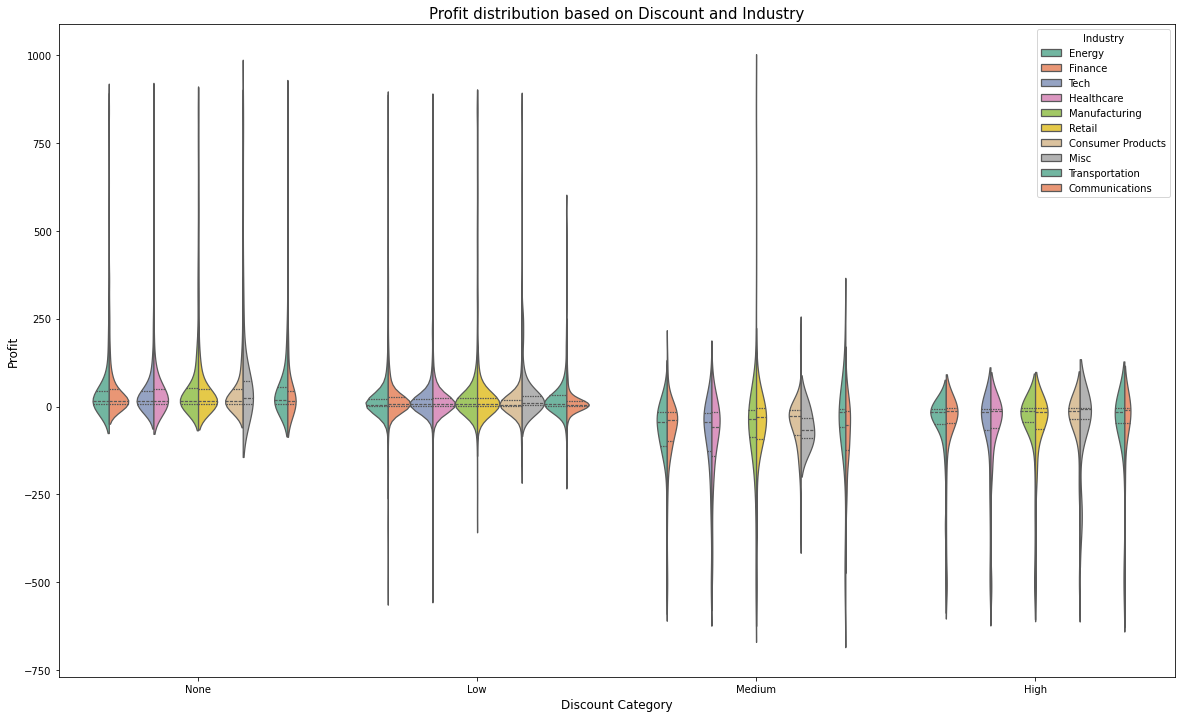

In [42]:
plt.figure(figsize=(20, 12))
sns.violinplot(x='Discount_Category', y='Profit_winsorized', hue='Industry', data=df, split=True, inner='quart', palette='Set2')

# Menambahkan judul dan label sumbu
plt.title('Profit distribution based on Discount and Industry', fontsize=15)
plt.xlabel('Discount Category', fontsize=12)
plt.ylabel('Profit', fontsize=12)

# Menampilkan plot
plt.show()

Based on the both chart, almost all category of Industry have negative skew for the medium and high discount, which means it can reduce profit even to losses. So, we have to consider to reduce to give medium or high discount for each category on industry.

* Segment

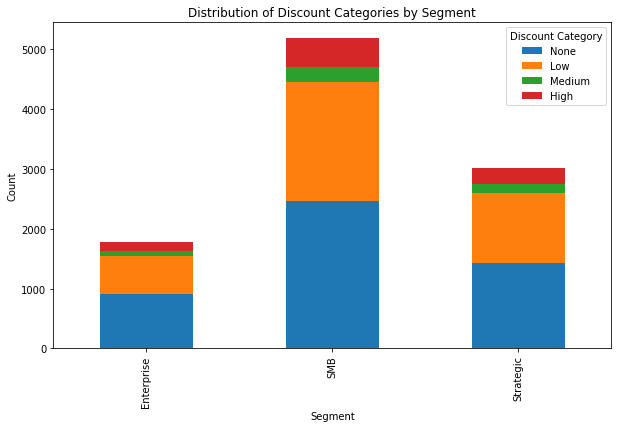

In [43]:
pivot_df2 = df.pivot_table(index='Segment', columns='Discount_Category', aggfunc='size', fill_value=0)

# Plot stacked bar chart
pivot_df2.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title("Distribution of Discount Categories by Segment")
plt.xlabel("Segment")
plt.ylabel("Count")
plt.legend(title="Discount Category")
plt.show()

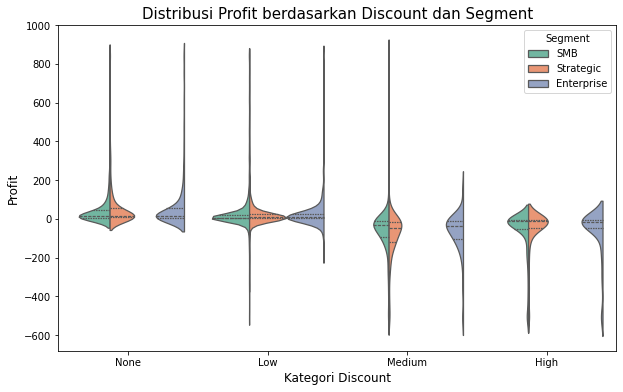

In [44]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Discount_Category', y='Profit_winsorized', hue='Segment', data=df, split=True, inner='quart', palette='Set2')

# Menambahkan judul dan label sumbu
plt.title('Distribusi Profit berdasarkan Discount dan Segment', fontsize=15)
plt.xlabel('Kategori Discount', fontsize=12)
plt.ylabel('Profit', fontsize=12)

# Menampilkan plot
plt.show()

For the segment column, medium and high category also give extreme negative skew to profit and then for the low category, we also have to consider to reduce or remove the discount for SMB and Strategic segment.

Next, we will show the distribution of the correlation between Profit and Discount for each country. The lowest index value (most negative) show that the discount effect negative profit and have to consider to remove or reduce the discount from the country

<ipython-input-45-d1444bbfc0cf>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




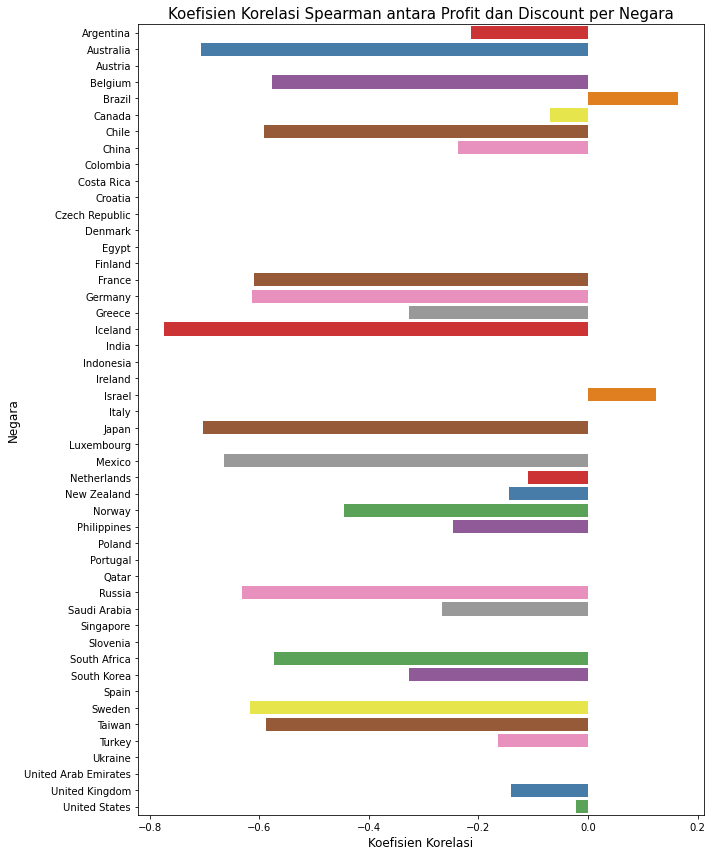

In [45]:
correlation_per_country = df.groupby('Country').apply(lambda x: x[['Profit_winsorized', 'Discount']].corr(method='spearman').iloc[0, 1]).reset_index(name='Correlation')

plt.figure(figsize=(10, 12))

sns.barplot(x='Correlation', y='Country', data=correlation_per_country, palette='Set1')
plt.title('Koefisien Korelasi Spearman antara Profit dan Discount per Negara', fontsize=15)
plt.xlabel('Koefisien Korelasi', fontsize=12)
plt.ylabel('Negara', fontsize=12)

# Menampilkan plot
plt.tight_layout()
plt.show()

All factors that are directly correlated with discounts and also impact profit should be carefully examined. We need to adjust our discount strategy, as excessive discounting can reduce profit even to losses. Special attention should be given to factors associated with the highest discounts, as they may have the greatest effect on profit margins.

Next, in addition, for the categorical data, we will examine the unique values in each column.

In [46]:
col_unique = ['Contact Name','Country','City','Region','Subregion','Customer','Industry','Segment','Product']
num_unique = [df[i].nunique() for i in col_unique]

pd.DataFrame({'Column' : col_unique, 'Count of unique values' : num_unique })

,Column,Count of unique values
0,Contact Name,793
1,Country,48
2,City,262
3,Region,3
4,Subregion,12
5,Customer,99
6,Industry,10
7,Segment,3
8,Product,14


We use only the columns 'Region,' 'Subregion,' 'Industry,' 'Segment,' and 'Product' for profit analysis, as each has fewer than 15 unique values.

In this section, we will analysize, what columns that effect on Profit

In [47]:
col_profit_analysis = ['Region','Subregion','Industry','Segment','Product']
total_profit = []
median_profit = []
for i in col_profit_analysis:
    total_ = df.groupby(i)['Profit_winsorized'].sum()
    median_ = df.groupby(i)['Profit_winsorized'].median()
    total_profit.append(total_)
    median_profit.append(median_)

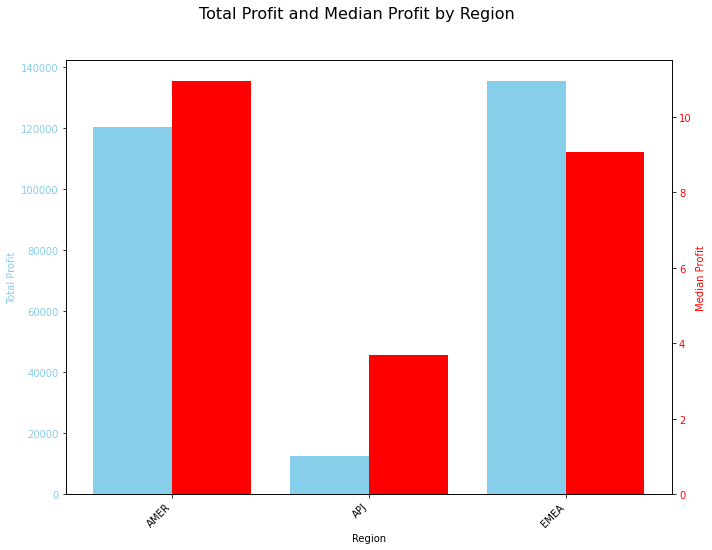

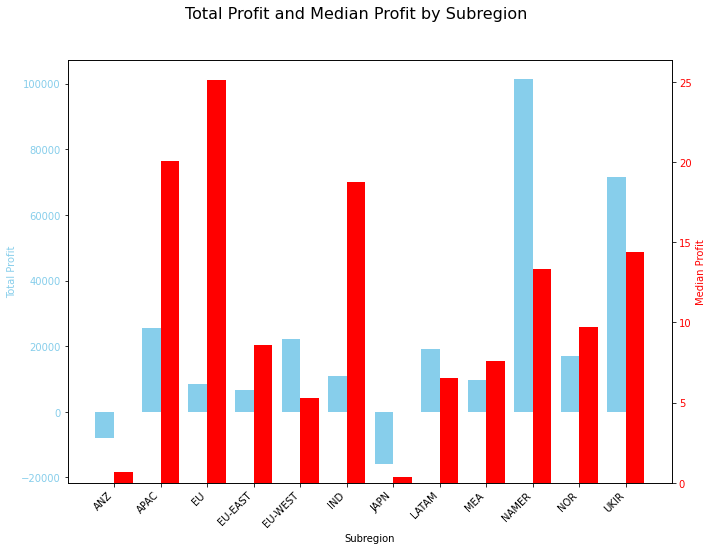

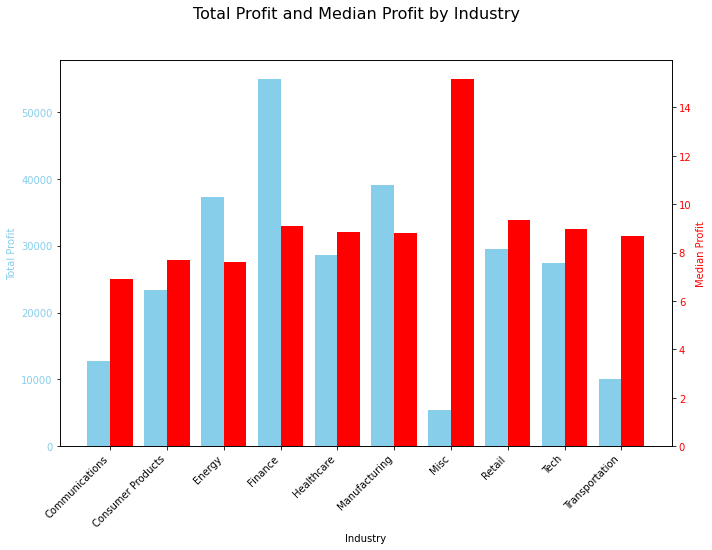

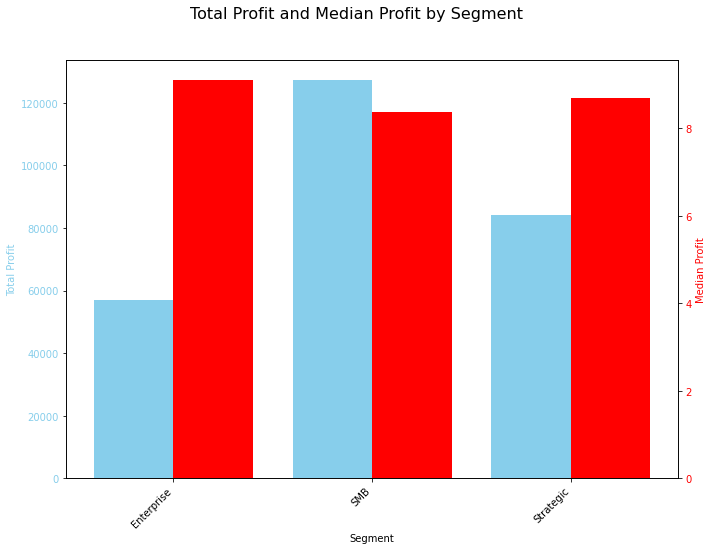

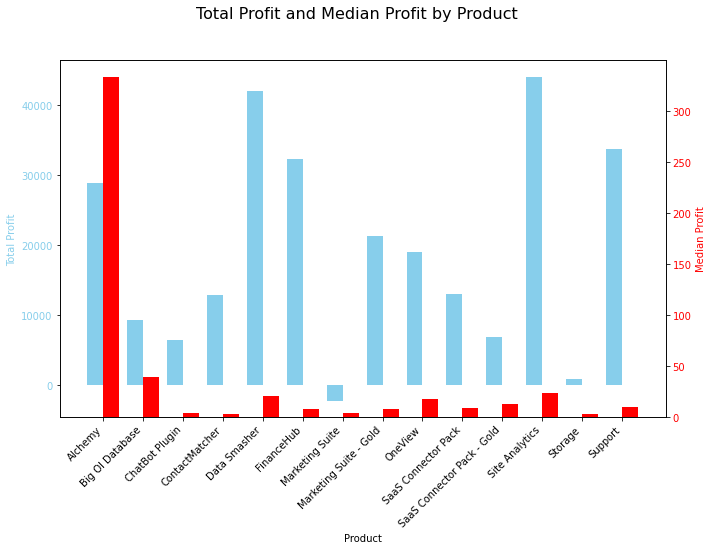

In [48]:

for i in range(len(col_profit_analysis)):
    total_profit_ = total_profit[i]
    median_profit_ = median_profit[i]
    x = np.arange(len(total_profit_.index))

    # Membuat figure dan axis
    fig, ax = plt.subplots(figsize=(10, 8), facecolor='white')
    fig.suptitle(f'Total Profit and Median Profit by {col_profit_analysis[i]}', fontsize=16)

    # Bar chart untuk Total Profit
    ax.bar(x - 0.2, total_profit_.values, width=0.4, color='skyblue', label='Total Profit')
    ax.set_xlabel(col_profit_analysis[i])
    ax.set_ylabel('Total Profit', color='skyblue')
    ax.tick_params(axis='y', labelcolor='skyblue')
    ax.set_xticks(x)
    ax.set_xticklabels(total_profit_.index, rotation=45, ha='right')

    # Bar chart untuk Median Profit di sumbu y kedua
    ax2 = ax.twinx()
    ax2.bar(x + 0.2, median_profit_.values, width=0.4, color='red', label='Median Profit')
    ax2.set_ylabel('Median Profit', color='red')
    ax2.tick_params(axis='y', labelcolor='red')

    # Menambahkan layout agar tidak bertumpuk
    plt.tight_layout(rect=[0, 0.03, 1, 0.95]) 
    plt.show()

We use the Kruskal test on each column for deeper analysis to determine whether there is any significant difference between the categories.

In [49]:
alpha = 0.05

* Region

In [50]:
stat, p_value = stats.kruskal(*[df[df['Region']== region]['Profit_winsorized'] for region in df['Region'].unique()])

print("Kruskal-Wallis Test Statistic:", stat)
print("p-value:", p_value)

if p_value < alpha:
    print("There is a significant difference in median profit between Region groups")
else:
    print("There is no significant difference in median profit between Region groups")

Kruskal-Wallis Test Statistic: 325.47806159991774
p-value: 2.105411221355629e-71
There is a significant difference in median profit between Region groups


* Subregion

In [51]:
stat, p_value = stats.kruskal(*[df[df['Subregion']== subregion]['Profit_winsorized'] for subregion in df['Subregion'].unique()])

print("Kruskal-Wallis Test Statistic:", stat)
print("p-value:", p_value)

if p_value < alpha:
    print("There is a significant difference in median profit between Subregion groups")
else:
    print("There is no significant difference in median profit between Subregion groups")

Kruskal-Wallis Test Statistic: 1380.7244374662512
p-value: 1.7350967162404567e-289
There is a significant difference in median profit between Subregion groups


* Industry

In [52]:
stat, p_value = stats.kruskal(*[df[df['Industry']== industry]['Profit_winsorized'] for industry in df['Industry'].unique()])

print("Kruskal-Wallis Test Statistic:", stat)
print("p-value:", p_value)

if p_value < alpha:
    print("There is a significant difference in median profit between Industry groups")
else:
    print("There is no significant difference in median profit between Industry groups")

Kruskal-Wallis Test Statistic: 23.957533346297108
p-value: 0.004368957077092857
There is a significant difference in median profit between Industry groups


For this column, based on the statistic test above, there is a significant difference between industry group. But, if we remove the 3 bottom total profit (see the bar chart), we will get the different result as the following below:

In [53]:
stat, p_value = stats.kruskal(*[df[df['Industry']== industry]['Profit_winsorized'] for industry in df['Industry'].unique() if industry not in ['Misc','Transportation','Communications']])

print("Kruskal-Wallis Test Statistic:", stat)
print("p-value:", p_value)

if p_value < alpha:
    print("There is a significant difference in median profit between Industry groups")
else:
    print("There is no significant difference in median profit between Industry groups")

Kruskal-Wallis Test Statistic: 12.5390283269569
p-value: 0.05096907176892044
There is no significant difference in median profit between Industry groups


So, outside of the 3 group ['Misc','Transportation','Communications'], each group in the column Industry is no significant difference in median profit.

* Segment

In [54]:
stat, p_value = stats.kruskal(*[df[df['Segment']== segment]['Profit_winsorized'] for segment in df['Segment'].unique()])

print("Kruskal-Wallis Test Statistic:", stat)
print("p-value:", p_value)

if p_value < alpha:
    print("There is a significant difference in median profit between Segment groups")
else:
    print("There is no significant difference in median profit between Segment groups")

Kruskal-Wallis Test Statistic: 4.372237096494942
p-value: 0.11235199221947198
There is no significant difference in median profit between Segment groups


* Product

In [55]:
stat, p_value = stats.kruskal(*[df[df['Product']== product]['Profit_winsorized'] for product in df['Product'].unique()])

print("Kruskal-Wallis Test Statistic:", stat)
print("p-value:", p_value)

if p_value < alpha:
    print("There is a significant difference in median profit between Product groups")
else:
    print("There is no significant difference in median profit between Product groups")

Kruskal-Wallis Test Statistic: 1086.8975770661962
p-value: 3.730374144339591e-224
There is a significant difference in median profit between Product groups


For the hypothesis testing, we conclude that the columns Region, Subregion, and Product show a significant difference in median profit across each group or category. This indicates that these columns can help identify which categories have a greater or lesser impact on profit, allowing us to strategize effectively for the future. However, for the next stage of analysis, we will focus solely on the Product column, as Region and Subregion have already been analyzed in previous sections.

The below, we try to create the new metric to evaluate each product based on the profit

In [56]:
profit_stats = df.groupby('Product')['Profit_winsorized'].agg(
    median='median',
    MAD=lambda x: np.median(np.abs(x - np.median(x))),
    count_positive=lambda x: (x >= 0).sum(),
    count_negative=lambda x: (x < 0).sum(),
    min_profit='min',
    max_profit='max',
    total_profit='sum'
).sort_values(by='total_profit', ascending=False).reset_index()

# Menampilkan hasil
profit_stats

,Product,median,MAD,count_positive,count_negative,min_profit,max_profit,total_profit
0,Site Analytics,23.52480,22.92540,753,136,-386.3916,843.1706,44063.9113
1,Data Smasher,21.00000,19.34400,684,91,-75.5958,829.3754,41936.6357
2,Support,10.03440,6.40560,1527,33,-509.9970,352.2960,33679.8308
3,FinanceHub,7.76880,16.86180,746,235,-509.9970,770.3520,32257.3053
4,Alchemy,332.99420,223.99790,68,0,59.9980,843.1706,28818.5627
5,Marketing Suite - Gold,7.75700,9.61860,685,161,-337.8060,792.2691,21278.8264
6,OneView,17.44650,16.89180,399,67,-509.9970,793.7160,19065.3058
7,SaaS Connector Pack,9.10200,8.03400,790,167,-427.4500,387.5676,13059.1436
8,ContactMatcher,3.14760,13.67610,1026,816,-509.9970,843.1706,12842.5630
9,Big Ol Database,38.99740,176.99990,71,44,-509.9970,843.1706,9337.1142


Here are brief descriptions of each metric:

* Median: The middle value of the profit distribution when sorted, representing the central tendency of the data.
* MAD (Median Absolute Deviation): A measure of variability, showing the average absolute deviation from the median. It helps assess how spread out the data is around the median.
* Count Positive: The number of transactions where profit is positive (include non negative, 0), indicating the frequency of profitable outcomes.
* Count Negative: The number of transactions where profit is negative, indicating how often the business experiences losses.
* Min Profit: The lowest profit value in the dataset, showing the minimum level of profitability for each product.
* Max Profit: The highest profit value in the dataset, showing the maximum profitability achieved for each product.
* Total Profit: The sum of all profit values, representing the overall profit generated by each product.

In this section, we will explore various key metrics that highlight the performance and variability of profits across different products. The following visualizations provide insights into:

1. Total Profit: We will examine the top and bottom 5 products based on their total profit, helping us identify the most and least profitable products.
2. Median Profit: This metric shows the central tendency of profits, and we will explore the products with the highest and lowest median profit.
3. Median Absolute Deviation (MAD): MAD reflects the consistency of profit for each product. A higher MAD indicates greater variability in profit.
4. Count of Positive vs. Negative Transactions: We will analyze the number of profitable (positive) and unprofitable (negative) transactions per product, giving us an understanding of how often each product yields profitable versus unprofitable outcomes.

Each chart will highlight the contrast between the top and bottom-performing products based on these metrics, allowing us to pinpoint areas for potential improvement and risk management.

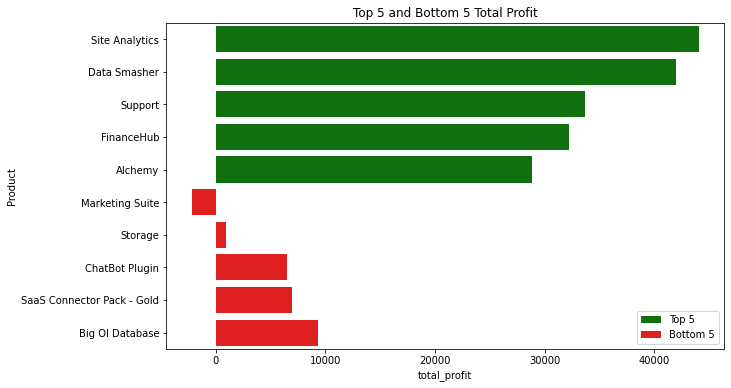

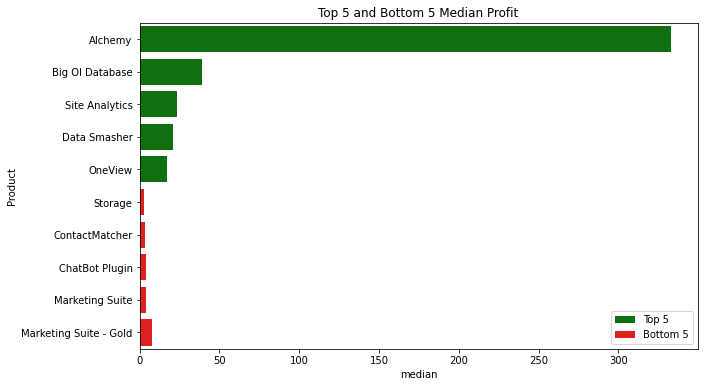

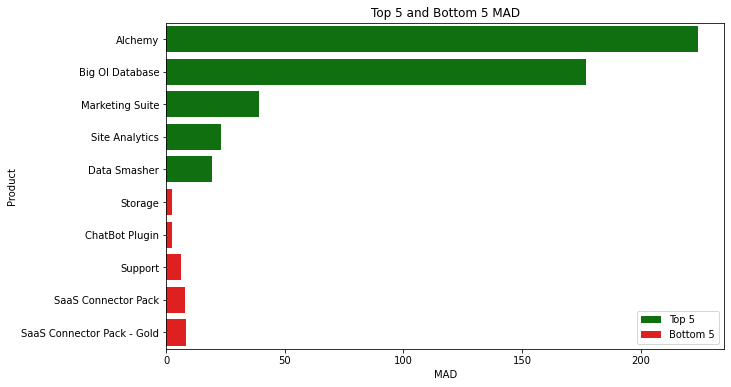

<Figure size 864x432 with 0 Axes>

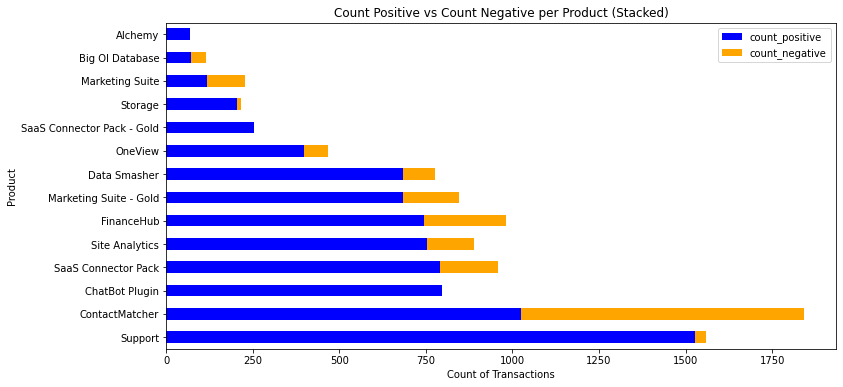

In [63]:
# 1. Top 5 Total Profit - Bottom 5 Total Profit
plt.figure(figsize=(10, 6))
sns.barplot(x='total_profit', y='Product', data=profit_stats.nlargest(5, 'total_profit'), color='green', label='Top 5')
sns.barplot(x='total_profit', y='Product', data=profit_stats.nsmallest(5, 'total_profit'), color='red', label='Bottom 5')
plt.title('Top 5 and Bottom 5 Total Profit')
plt.legend()
plt.show()

# 2. Top 5 Median - Bottom 5 Median
plt.figure(figsize=(10, 6))
sns.barplot(x='median', y='Product', data=profit_stats.nlargest(5, 'median'), color='green', label='Top 5')
sns.barplot(x='median', y='Product', data=profit_stats.nsmallest(5, 'median'), color='red', label='Bottom 5')
plt.title('Top 5 and Bottom 5 Median Profit')
plt.legend()
plt.show()

# 3. Top 5 MAD - Bottom 5 MAD
plt.figure(figsize=(10, 6))
sns.barplot(x='MAD', y='Product', data=profit_stats.nlargest(5, 'MAD'), color='green', label='Top 5')
sns.barplot(x='MAD', y='Product', data=profit_stats.nsmallest(5, 'MAD'), color='red', label='Bottom 5')
plt.title('Top 5 and Bottom 5 MAD')
plt.legend()
plt.show()

# 4. Stacked Bar
plt.figure(figsize=(12, 6))
profit_stats_sorted = profit_stats.sort_values(by='count_positive', ascending=False)
profit_stats_sorted.set_index('Product', inplace=True)

profit_stats_sorted[['count_positive', 'count_negative']].plot(kind='barh', stacked=True, figsize=(12, 6), color=['blue', 'orange'])

plt.title('Count Positive vs Count Negative per Product (Stacked)')
plt.xlabel('Count of Transactions')
plt.ylabel('Product')
plt.show()


Based on the analysis of key profit metrics across various products, we have several insight as follows: 
1. Top Performers in Total Profit: 
Products like "Site Analytics" and "Data Smasher" stand out with the highest total profits, suggesting they are strong revenue drivers despite the variability in profit. Focusing on maintaining or expanding these products could help sustain profitability.

2. High Median Profit but Low Transaction Count:
"Alchemy" has an exceptionally high median profit but only a small number of transactions (68), all of which are positive. This suggests that while the product is highly profitable per transaction, it may benefit from increased sales or marketing efforts to enhance its contribution to overall profits.

3. Significant Profit Variability in Certain Products:
Products like "Big Ol Database" and "Marketing Suite" show high median absolute deviation (MAD), indicating significant fluctuation in profit per transaction. This high variability could signal risk and highlight the need for stabilization strategies or closer monitoring.

4. Product Reliance on Positive Transactions:
Products such as "ChatBot Plugin" and "SaaS Connector Pack - Gold" show zero or very low negative transactions, which suggests a reliable performance in maintaining positive profits. These could be low-risk products where growth or increased investment could yield predictable returns.

5. High Frequency of Negative Transactions and Net Loss:
"Marketing Suite" has a negative total profit and a high count of negative transactions (109 out of 228), making it the least profitable product in the dataset. This product may require a strategic reassessment or possible repositioning, as it currently contributes a loss rather than profit.

In [66]:
#Saving the data to xlsx
with pd.ExcelWriter('tabel_SaaS_seperated.xlsx', engine='openpyxl') as writer:
    df.to_excel(writer, sheet_name='Tabel_1', index=False)
    customer_sales.to_excel(writer, sheet_name='Tabel_2', index=False)
    correlation_matrix.to_excel(writer, sheet_name='Tabel_3', index=False)
    correlation_per_country.to_excel(writer, sheet_name='Tabel_4', index=False)
    profit_stats.to_excel(writer, sheet_name='Tabel_5', index=False)

print("Finsihed")

Finsihed


# Thank You

Author : Muh. Afdal Abidin